# Понижение размерности данных с помощью метода главных компонент и сингулярного разложения
Группа: ИВТ-М20.<br/>
Студент: Архипов Дмитрий Алексеевич

In [1]:
from math import isnan
import matplotlib as mpl
from pprint import pprint
import matplotlib.pyplot as plt
from warnings import filterwarnings
from typing import (
    Any,
    Union
)
from pandas import (
    DataFrame,
    read_csv,
    Series,
    read_table,
    lreshape
)
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    RidgeClassifier
)
from sklearn.metrics import (
    r2_score,
    mean_absolute_error
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

In [2]:
filterwarnings('ignore')
mpl.style.use(['ggplot'])

## Прочтите данные из файлов

In [10]:
sop1: DataFrame = DataFrame(
    read_table(
        "data/train/SOP1.dat",
        sep="\s+",
        header=0
    )
)
sop1.name = "SOP1"

In [3]:
sop2: DataFrame = DataFrame(
    read_table(
        "data/train/SOP2.dat",
        sep="\s+",
        header=0
    )
)
sop2.name = "SOP2"

In [4]:
sop3: DataFrame = DataFrame(
    read_table(
        "data/train/SOP3.dat",
        sep="\s+",
        header=0
    )
)
sop3.name = "SOP3"

In [5]:
target1: DataFrame = DataFrame(
    read_csv(
        "data/train/target1.csv",
        sep=",",
        header=0
    )
)
target1.name = "target1"

In [6]:
target2: DataFrame = DataFrame(
    read_csv(
        "data/train/target2.csv",
        sep=",",
        header=0
    )
)
target2.name = "target2"

In [7]:
target3: DataFrame = DataFrame(
    read_csv(
        "data/train/target3.csv",
        sep=",",
        header=0
    )
)
target3.name = "target3"

##  Отобразите несколько первых и несколько последних записей.

In [8]:
def printer(variable):
    pprint(variable.name)
    print(end="\n")
    pprint(variable.head())
    print(end="\n\n")
    pprint(variable.tail())
    print(end="\n\n\n\n")

In [11]:
printer(sop1)

'SOP1'

                       0000  29-08-03  12:34:21  +20C  257  325   16   5  ���1
1 0 35 202 27 29 35 0     0       255       147    54  119  125  212  17    39
2 0 23 190 27 22 29 0     0       255       147    56   95  156  223  13    27
3 1 0  188 24 10 13 0     0       255       145    59   40  172  254  10     0
4 5 0  183 26 6  1  0     0       255       153    66   22  172  255   7     0
5 4 0  188 32 4  0  0     0       255       157    62   18  170  255  14    21


                        0000  29-08-03  12:34:21  +20C  257  325  16   5  ���1
1038 0 0 159 36 0  0 0     0       255       175     0    0  127  11   0     1
1039 0 0 189 56 0  0 0     0       255       221     0    0  129   6   0     9
1040 0 0 188 64 16 0 0     0       255       232     0    0  163   0   0    15
1041 0 0 177 43 25 0 0     0       255       181     0    0  198   1  11    13
1042 0 0 177 22 21 0 0     0       255       133     0    0  217   0   0     9






In [12]:
printer(sop2)

'SOP2'

                     0000  29-08-03  13:00:27  +23C  257  325   16   5  СОП2
1 0 0 175 12 0  0 0     0       255       112     0    0  233  173   2    23
2 0 0 159 10 10 0 0     0       255       108     0    0  222  173  10    34
3 0 0 139 25 48 0 0     0       255       145     0    0  230  175  18    18
4 0 0 130 54 61 0 0     0       255       216     0    1  237  185  52    22
5 0 0 110 54 57 0 0     0       236       207     3    4  239  205  43    20


                       0000  29-08-03  13:00:27  +23C  257  325  16   5  СОП2
1035 0 0 0 0  0  0 0      0         0        79     0   28  166   4   0    21
1036 0 0 0 17 0  0 0      0         4       123     0   48  163  16  14     2
1037 0 0 0 17 2  0 0      0         9       122     0   34  125  31   0    11
1038 0 0 0 11 26 0 11     0         0       110     0   27  132  42   0     2
1039 0 0 0 9  43 0 0      0         0       104     0   14  147  40   4    11






In [13]:
printer(sop3)

'SOP3'

                      0000  29-08-03  13:49:13  +21C  257  325   16   5  ���3
1 0 0 0 10 148 56 0      3        39       118     0    4   88  154  49    14
2 0 0 0 28 129 55 0      0        48       150     0    0   67  140  54     5
3 0 0 0 48 94  58 13     0        16       210     0    0   47   98  59    62
4 0 0 0 54 68  51 0      0        18       244     2    0   37   73  29    12
5 0 0 0 81 46  36 0      0        16       255    11    0   41   58  15     3


                        0000  29-08-03  13:49:13  +21C  257  325  16  5  ���3
1034 0 0 0 138 76 30 0     0         1       255     0   15    9   0  0     0
1035 0 0 0 134 71 45 0     0        26       255     0   24    2   0  0     0
1036 0 0 0 133 63 50 0     0        12       255     0   27    0   0  1     0
1037 0 0 0 132 41 47 0     0         5       255     0   27    0   0  0     0
1038 0 0 0 130 28 44 0     0         8       255     0   21    0   0  2     0






In [14]:
printer(target1)

'target1'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              51           42.0               7           L       A
1             200           40.0               6           L       B
2             278           39.0               4           L       A
3             365           43.0               6           L       B
4             460           27.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
3             365           43.0               6           L       B
4             460           27.0               5           L       A
5             845           36.0               4           L       B
6             959           62.0               6           L       A
7             141            NaN               4           T        






In [15]:
printer(target2)

'target2'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0             178           37.0               6           L       B
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A
5             123            NaN               3           T        






In [16]:
printer(target3)

'target3'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              26           42.0               5           L       A
1             172           47.0               6           L       B
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A
5             971           50.0               5           L       B
6             112            NaN               4           T        






##  Ящик с усами.

array([[<AxesSubplot:title={'center':'0000'}>,
        <AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'12:34:21'}>],
       [<AxesSubplot:title={'center':'+20C'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'325'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'���1'}>]], dtype=object)

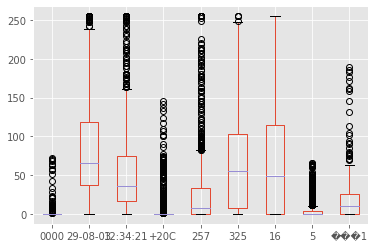

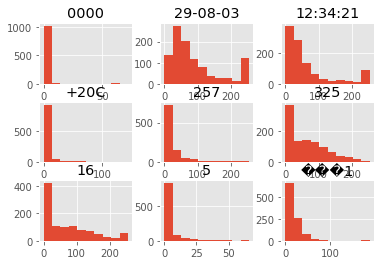

In [17]:
sop1.boxplot()
sop1.hist()

array([[<AxesSubplot:title={'center':'0000'}>,
        <AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'13:00:27'}>],
       [<AxesSubplot:title={'center':'+23C'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'325'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'СОП2'}>]], dtype=object)

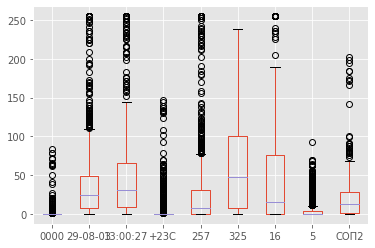

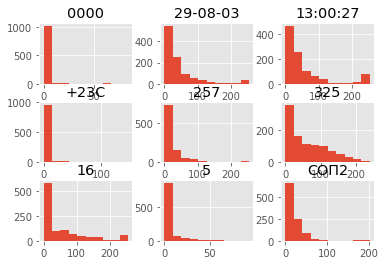

In [19]:
sop2.boxplot()
sop2.hist()

array([[<AxesSubplot:title={'center':'0000'}>,
        <AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'13:49:13'}>],
       [<AxesSubplot:title={'center':'+21C'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'325'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'���3'}>]], dtype=object)

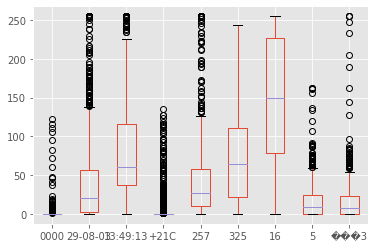

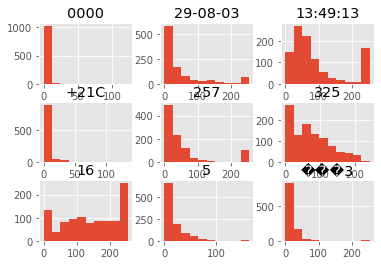

In [18]:
sop3.boxplot()
sop3.hist()


## Вектор с результатами наличия дефектов

In [35]:
array1 = [0] * sop1.count()[0]
array2 = [0] * sop2.count()[0]
array3 = [0] * sop3.count()[0]

ser1: Series = Series(data=array1)
ser2: Series = Series(data=array2)
ser3: Series = Series(data=array3)

serH1: Series = Series(data=array1)
serH2: Series = Series(data=array2)
serH3: Series = Series(data=array3)


In [29]:
def defects(target, series):
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = 1
    return series

In [44]:
ser1 = defects(target1, ser1)
ser2 = defects(target2, ser2)
ser3 = defects(target2, ser3)

## Вектор, содержащий значения высоты дефектов в местах их наличия

In [23]:
def defects_height(target, series):
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = row['Высота дефекта']
    return series

In [37]:
serH1 = defects_height(target1, ser1)
serH2 = defects_height(target2, ser2)
serH3 = defects_height(target3, ser3)


## Разбиение данных на обучающую и проверочную выборки

In [38]:
sop_train1, sop_test1, target_train1, target_test1 = train_test_split(sop1, ser1, test_size=0.3, train_size=0.7)
sop_train2, sop_test2, target_train2, target_test2 = train_test_split(sop2, ser2, test_size=0.3, train_size=0.7)
sop_train3, sop_test3, target_train3, target_test3 = train_test_split(sop3, ser3, test_size=0.3, train_size=0.7)

## Последовательное применение алгоритмов

In [45]:
# LogisticRegression
lr: LogisticRegression = LogisticRegression()
lr.fit(sop_train1, target_train1)

LogisticRegression()

In [51]:
# SGDClassifier
sgdc: SGDClassifier = SGDClassifier()
sgdc.fit(sop_train2, target_train2)

SGDClassifier()

In [52]:
# RidgeClassifier
rc: RidgeClassifier = RidgeClassifier()
rc.fit(sop_train3, target_train3)


RidgeClassifier()

## Оценка качества модели

In [49]:
def estimate(classifier, vtest, ttest):
    pred = classifier.predict(vtest)
    print(f"r2_score: {round(r2_score(ttest, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(ttest, pred), 3)}")

In [50]:
print("LogisticRegression")
estimate(lr, sop_test1, target_test1)

LogisticRegression
r2_score: -0.009
mean_absolute_error: 1.147


In [53]:
print("SGDClassifier")
estimate(sgdc, sop_test2, target_test2)

SGDClassifier
r2_score: -0.612
mean_absolute_error: 1.237


In [54]:
print("RidgeClassifier")
estimate(rc, sop_test3, target_test3)

RidgeClassifier
r2_score: -0.376
mean_absolute_error: 1.731


## Подбор гиперпараметров

In [56]:
print("LogisticRegression")
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
grid = GridSearchCV(
    LogisticRegression(),
    parameters,
    cv=5
)
lr_grid = grid.fit(sop_train1, target_train1)
print(lr_grid)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


In [58]:
print("SGDClassifier")
parameters = {
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}
grid = GridSearchCV(
    SGDClassifier(),
    parameters,
    cv=5
)
sgd_grid = grid.fit(sop_train2, target_train2)
print(sgd_grid)

SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


In [59]:
print("RidgeClassifier")
parameters = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid = GridSearchCV(
    RidgeClassifier(),
    parameters,
    cv=5
)
rc_grid = grid.fit(sop_train3, target_train3)
print(rc_grid)

RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})


## Заново обучите модель с подобранными гиперпараметрам

In [60]:
def relearn(classifier, vtest, ttest) -> None:
    print(classifier.best_params_)
    print(classifier.best_score_)
    pred: object = classifier.predict(vtest)
    print(f"r2_score: {round(r2_score(ttest, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(ttest, pred), 3)}")

In [61]:
print("LogisticRegression")
relearn(lr_grid, sop_test1, target_test1)

LogisticRegression
{'C': 0.01, 'penalty': 'l2'}
0.7297401983939537
r2_score: -0.009
mean_absolute_error: 1.147


In [62]:
print("SGDClassifier")
relearn(sgd_grid, sop_test2, target_test2)

SGDClassifier
{'alpha': 1, 'l1_ratio': 0.9}
0.8087954652810581
r2_score: -0.157
mean_absolute_error: 0.878


In [63]:
print("RidgeClassifier")
relearn(rc_grid, sop_test3, target_test3)

RidgeClassifier
{'alpha': 0.1}
0.6363438828530941
r2_score: -0.376
mean_absolute_error: 1.731


# Ответы на контрольные вопросы

### 1. Что такое система ПУЗК? Какие основные методы УЗК реализуются в данной системе?

### 2. Чем отличается эхо-метод от теневого и эхо-контактного метода УЗК?

### 3. Какие типы дефектов можно найти с помощью системы ПУЗК?